<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Финальный-комментарий" data-toc-modified-id="Финальный-комментарий-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><span style="color: green">Финальный комментарий<span></span></span></a></span></li><li><span><a href="#Комментарий-ревьювера" data-toc-modified-id="Комментарий-ревьювера-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Комментарий ревьювера</a></span></li><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Общий-комментарий" data-toc-modified-id="Общий-комментарий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий комментарий</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy import stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

display(query_1.info())
display(query_1.head(5))
display(query_3.info())
display(query_3.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [3]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [4]:
top_10_cities = query_3.sort_values(by='average_flights', ascending=False).head(10)
top_10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [5]:
display(query_1.isna().mean())
display(query_3.isna().mean())
top_10_cities.isna().mean()

model             0.0
flights_amount    0.0
dtype: float64

city               0.0
average_flights    0.0
dtype: float64

city               0.0
average_flights    0.0
dtype: float64

Типы данных корректные, пропусков нет.

**Модели самолётов и количество рейсов.**

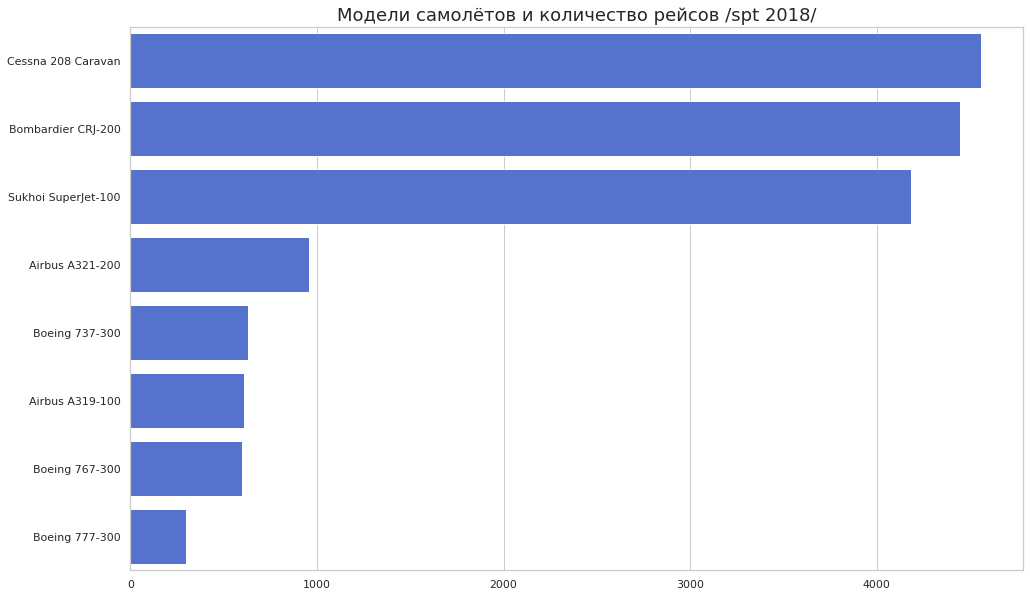

In [6]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(16, 10))
plt.title('Модели самолётов и количество рейсов /spt 2018/', fontsize=18)
sns.barplot(x='flights_amount', y='model',  data = query_1.sort_values(by='flights_amount', ascending=False), color='royalblue')
plt.xlabel('')
plt.ylabel('')
plt.show()

Для Borbardier(50 человек), Cessna(вместимость 14 человек) и Сухой(98 человек) характерна очень высокая частота полетов. Это объясняется тем, что данные модели используются для коротких и частых перелетов. Самый крупный самолет - Боинг 777-300 (вместимость 450 человек), совершил меньше всего рейсов, т.к. предназначен для длительных перелетов.

**Города и количество рейсов.**

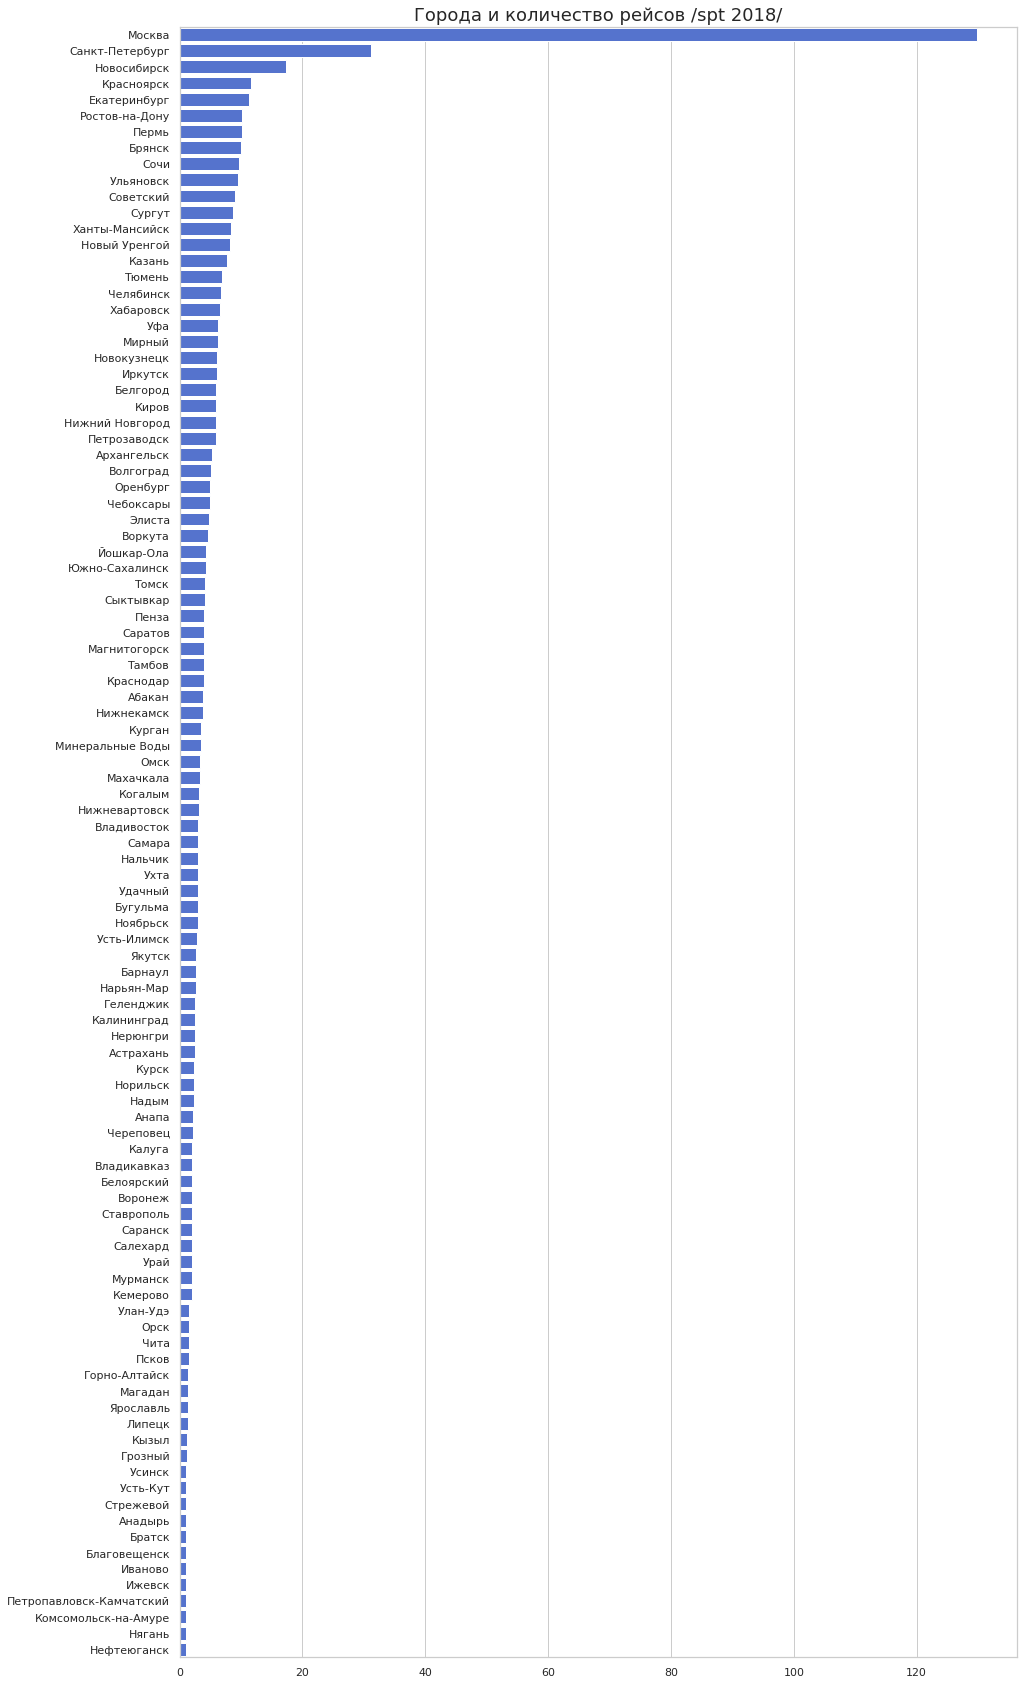

In [7]:
plt.figure(figsize=(15, 30))
plt.title('Города и количество рейсов /spt 2018/', fontsize=18)
sns.barplot(x='average_flights', y='city', data=query_3.sort_values(by='average_flights', ascending=False), color='royalblue')
plt.xlabel('')
plt.ylabel('')
plt.show()

Важными воздушнотранспортными узлами являются Москва, Санкт-Петербург и Новосибирск. Это города, в которых можно совершить пересадки на международные рейсы, дополнительный вклад вносит количество и размер аэропортов.

**Топ-10 городов и количество рейсов**

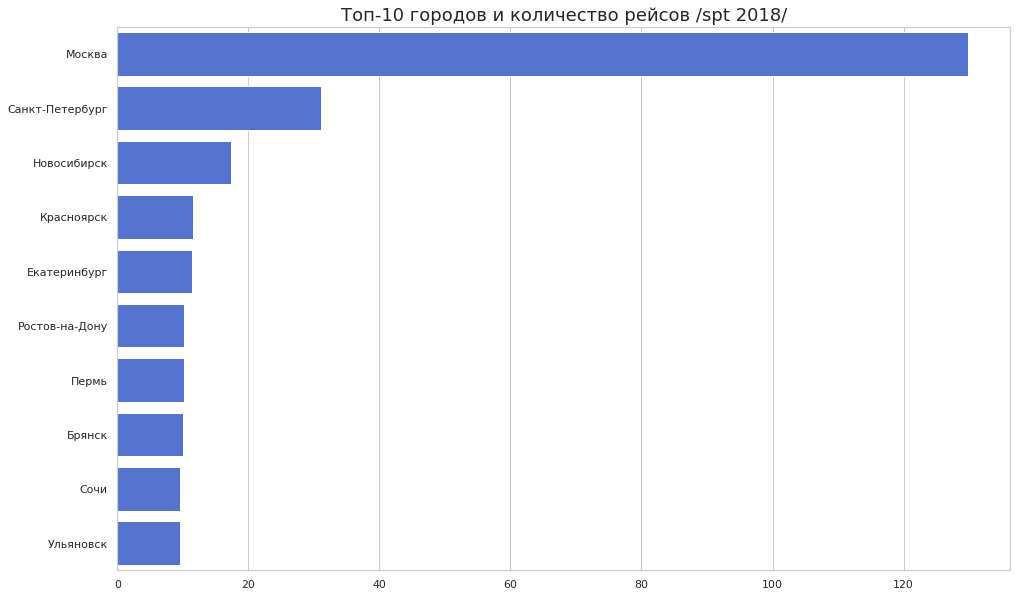

In [8]:
plt.figure(figsize=(16, 10))
plt.title('Топ-10 городов и количество рейсов /spt 2018/', fontsize=18)
sns.barplot(x='average_flights', y='city', data=top_10_cities.sort_values(by='average_flights', ascending=False), color='royalblue')
plt.xlabel('')
plt.ylabel('')
plt.show()

Москва, являясь крупнейшим воздушнотранспортным узлом, лидирует с большим отрывом. Все города, не попавшие в 3 лидеров, имеют в среднем по 10 рейсов.

**Вывод.**

Проанализированы данные о полетах за сентябрь 2018 года. Приведены зависимости количества рейсов от различных параметров. 

Ожидаемо, что в крупных городах большое количество различных рейсов; наблюдается некоторая зависимость между вместимостью-дальностью моделей самолетов и количеством рейсов, ими совершаемых.

Какой-то особой зависимости между наличием фестивалей и спросом на билеты не обнаружено, можно сделать вывод, что фестивали на спрос не влияют.